In [ ]:
import pandas as pd
df=pd.read_csv('/content/qapairs_data_hausa.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# import spacy
import scipy.io
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import json
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Reshape
from tensorflow.keras import Input
#from keras.layers.recurrent import LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.python.keras.layers.merge import Concatenate
from tensorflow.keras.models import model_from_json, Model,Sequential
from tensorflow.keras.utils import plot_model
from collections import defaultdict
import operator
from tensorflow.python.keras.utils import np_utils, generic_utils
#from progressbar import Bar, ETA, Percentage, ProgressBar
from itertools import zip_longest
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import Model,Input
from tensorflow.python.keras.layers.convolutional import Conv2D,Conv1D
from tensorflow.keras import initializers 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow.keras.backend as k
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint,TensorBoard
from time import time
from tensorflow.keras.regularizers import l1,l2,l1_l2
from scipy.sparse import hstack
import tensorflow.keras
from tqdm import tqdm
from datetime import datetime
# import cv2
%matplotlib inline
#%tensorflow_version 1.x

In [ ]:
new_df=df[df['validated']==1]

In [ ]:
new_df=new_df.drop(['gdrive_id', 'validated','qa_id'], axis=1)


In [ ]:
new_df

,image_id,ques_en,ans_en,ques_ha,ans_ha
0,2335177,What color is the man's shirt?,White.,Menene launin rigar mutumin?,Fari.
1,2392303,What is attached to the Westminster palace?,A tall tower.,Menene yake maƙale a jikin fadar Westminster?,Dogon hasumiya.
2,2321185,What are the horses walking on?,Sand.,Akan me dawakan suke tafiya?,Ƙasa.
3,2392923,What are the ties on top of?,Blanket.,A kan me ɗamarorin wuyan suke?,Bargo.
4,2365369,Why is the ground white?,It's snowing.,Meyasa ƙasan yayi fari?,Dusar ƙanƙara ke zuba.
...,...,...,...,...,...
4570,2332687,What color is the building?,White.,Wanne launi ne jikin gini?,Fari.
4571,2319154,Who is in photo?,Noone.,Waye a hoton?,Babu kowa.
4572,2354543,Why is her hair up?,So it won't get in the way.,Me yasa gashinta a sama?,Saboda kar ya shiga hanyar ta.
4573,2412380,Who is on the stage?,A band.,Waye akan dakalin?,ƙungiyar mawaƙa.


In [ ]:
word_count = new_df['ques_en'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1],reverse=True))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of questions')
plt.xlabel('Number of words in questions')
plt.title('Words for each question')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

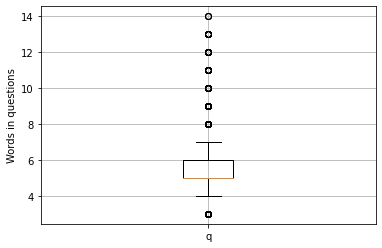

In [ ]:
que_word_count = new_df['ques_en'].str.split().apply(len)
plt.boxplot(que_word_count)
plt.xticks([1],'questions')
plt.ylabel('Words in questions')
plt.grid()
plt.show()

In [ ]:
!pip install transformers -q
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.8 MB/s eta 0:00:00


In [ ]:
import os
from copy import deepcopy
from dataclasses import dataclass
from typing import Dict, List, Optional, Tuple
from datasets import load_dataset, set_caching_enabled
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
from transformers import (
    # Preprocessing / Common
    AutoTokenizer, AutoFeatureExtractor,
    # Text & Image Models (Now, image transformers like ViTModel, DeiTModel, BEiT can also be loaded using AutoModel)
    AutoModel,            
    # Training / Evaluation
    TrainingArguments, Trainer,
    # Misc
    logging
)

# import nltk
# nltk.download('wordnet')
from nltk.corpus import wordnet

from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# SET CACHE FOR HUGGINGFACE TRANSFORMERS + DATASETS
os.environ['HF_HOME'] = os.path.join(".", "cache")
# SET ONLY 1 GPU DEVICE
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

set_caching_enabled(True)
logging.set_verbosity_error()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
#     print('Memory Usage:')
#     print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
#     print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

cuda:0
Tesla T4


In [ ]:
train=new_df.iloc[:3000,:]
test=new_df.iloc[3000:,:]

In [ ]:
train.to_csv('train.csv')
test.to_csv('test.csv')


In [ ]:
dataset = load_dataset(
    "csv", 
    data_files={
        "train": os.path.join("train.csv"),
        "test": os.path.join("test.csv")
    }
)


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-5cc8b133c17f4b3e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dataset = dataset.map(
    batched=True
)



  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'ques_en', 'ans_en', 'ques_ha', 'ans_ha'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['Unnamed: 0', 'ques_en', 'ans_en', 'ques_ha', 'ans_ha'],
        num_rows: 789
    })
})

In [ ]:
dataset = dataset.remove_columns(['Unnamed: 0'])

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['ques_en', 'ans_en', 'ques_ha', 'ans_ha'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['ques_en', 'ans_en', 'ques_ha', 'ans_ha'],
        num_rows: 789
    })
})

In [ ]:
from IPython.display import display

def showExample(train=True, id=None):
    if train:
        data = dataset["train"]
    else:
        data = dataset["test"]
    if id == None:
        id = np.random.randint(len(data))
    image = Image.open(os.path.join("..", "dataset", "images", data[id]["image_id"] + ".png"))
    display(image)

    print("Question:\t", data[id]["question"])
    print("Answer:\t\t", data[id]["answer"], "(Label: {0})".format(data[id]["label"]))